In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(plt.style.available)

plt.style.use("seaborn-v0_8-dark")


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [50]:
df = pd.read_csv("stores_sales_forecasting.csv", encoding="Latin-1")

print(df.head())

print(df.info())

print(df.isnull().sum())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   

   Region       Product ID

In [51]:
# Tarih sütunlarını datetime formatına çevirelim
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Değişiklikleri kontrol edelim
print(df[['Order Date', 'Ship Date']].head())


  Order Date  Ship Date
0 2016-11-08 2016-11-11
1 2016-11-08 2016-11-11
2 2015-10-11 2015-10-18
3 2014-06-09 2014-06-14
4 2014-06-09 2014-06-14


In [52]:
# Kategorik değişkenlerin sınıf dağılımını görelim
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"{col} - Sınıf sayısı: {df[col].nunique()}")
    print(df[col].value_counts())
    print("\n")


Order ID - Sınıf sayısı: 1764
Order ID
US-2015-129007    4
CA-2017-100111    4
US-2017-162558    4
CA-2015-104346    4
US-2015-138121    4
                 ..
CA-2017-111556    1
CA-2016-157686    1
CA-2015-152891    1
CA-2015-110016    1
CA-2017-121258    1
Name: count, Length: 1764, dtype: int64


Ship Mode - Sınıf sayısı: 4
Ship Mode
Standard Class    1248
Second Class       427
First Class        327
Same Day           119
Name: count, dtype: int64


Customer ID - Sınıf sayısı: 707
Customer ID
SV-20365    15
LC-16885     9
CJ-12010     9
KL-16555     9
JE-15745     9
            ..
KC-16540     1
GK-14620     1
DP-13165     1
DB-13360     1
IM-15055     1
Name: count, Length: 707, dtype: int64


Customer Name - Sınıf sayısı: 707
Customer Name
Seth Vernon        15
Lena Creighton      9
Caroline Jumper     9
Kelly Lampkin       9
Joel Eaton          9
                   ..
Kelly Collister     1
Grace Kelly         1
David Philippe      1
Dennis Bolton       1
Ionia McGrath       1
N

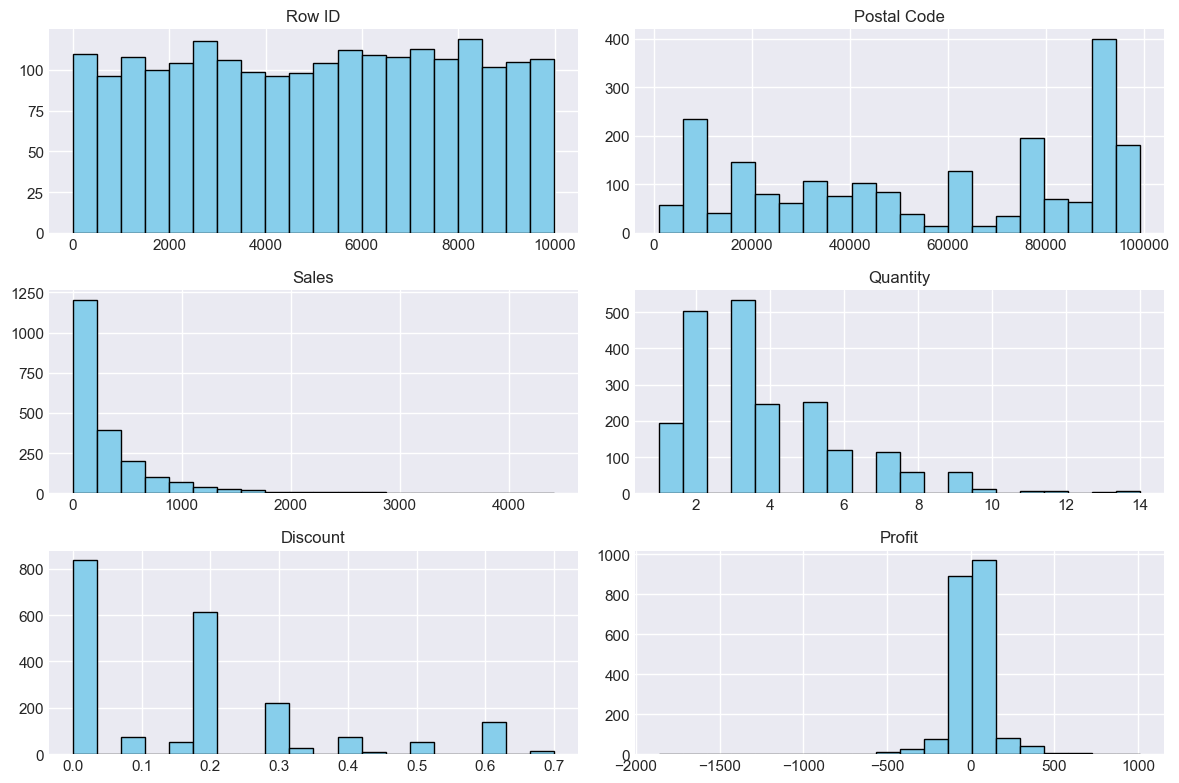

In [44]:
# Sayısal değişkenlerin dağılımlarını görselleştirelim
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_columns].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


count    2121.000000
mean        3.917020
std         1.755234
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Shipping Duration, dtype: float64


c:\Users\asus\anaconda3\envs\miuul1env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


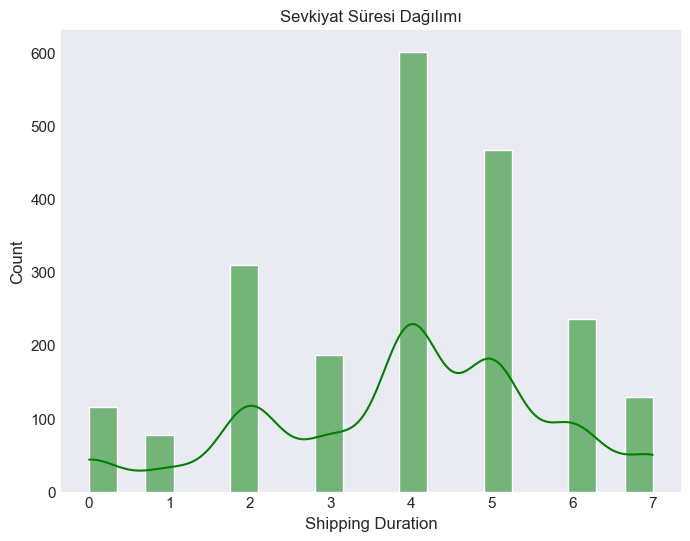

In [66]:
# Sevkiyat süresini hesaplayalım (Ship Date - Order Date)
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

# Sevkiyat süresi ile ilgili istatistiksel bilgiler
print(df['Shipping Duration'].describe())

# Sevkiyat süresinin dağılımını görselleştirelim
plt.figure(figsize=(8, 6))
sns.histplot(df['Shipping Duration'], bins=20, kde=True, color='green')
plt.title("Sevkiyat Süresi Dağılımı")
plt.show()


In [53]:
# Object türündeki sütunları seçelim
categorical_columns = ["Ship Mode", "Segment", "Sub-Category" ,"Region"]
# Bu sütunları category veri tipine dönüştürelim
df[categorical_columns] = df[categorical_columns].astype('category')

# Değişiklikleri kontrol edelim
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   category      
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   category      
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   category      
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [54]:
# Temel istatistiksel özet
print(df.describe().T)


              count                           mean                  min  \
Row ID       2121.0                    5041.643564                  1.0   
Order Date     2121  2016-04-30 03:54:13.748231680  2014-01-06 00:00:00   
Ship Date      2121  2016-05-04 01:54:44.299858432  2014-01-10 00:00:00   
Postal Code  2121.0                   55726.556341               1040.0   
Sales        2121.0                     349.834887                1.892   
Quantity     2121.0                       3.785007                  1.0   
Discount     2121.0                       0.173923                  0.0   
Profit       2121.0                       8.699327           -1862.3124   

                             25%                  50%                  75%  \
Row ID                    2568.0               5145.0               7534.0   
Order Date   2015-05-26 00:00:00  2016-06-20 00:00:00  2017-05-14 00:00:00   
Ship Date    2015-05-31 00:00:00  2016-06-23 00:00:00  2017-05-18 00:00:00   
Postal Code 

c:\Users\asus\anaconda3\envs\miuul1env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


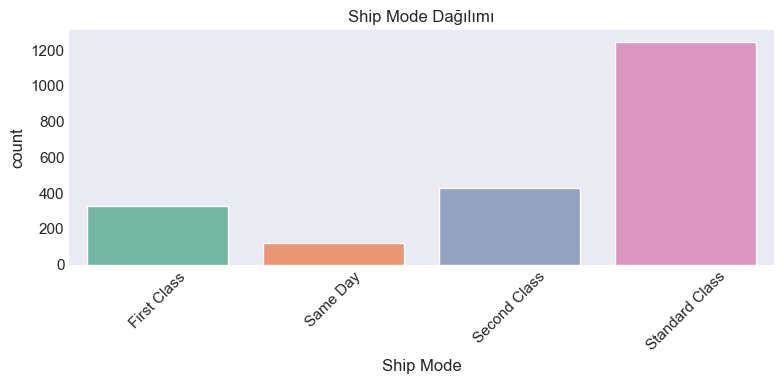

c:\Users\asus\anaconda3\envs\miuul1env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


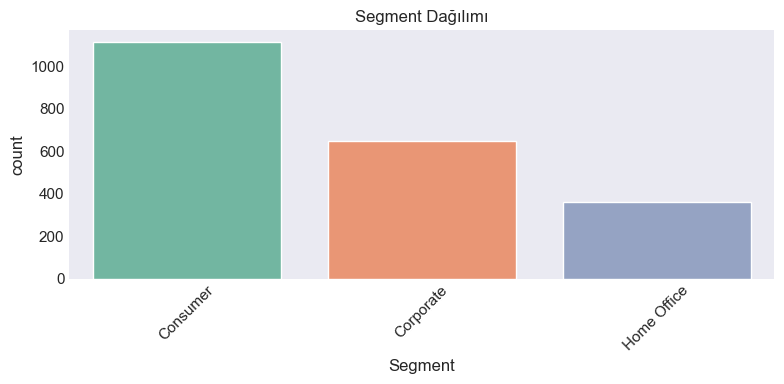

c:\Users\asus\anaconda3\envs\miuul1env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


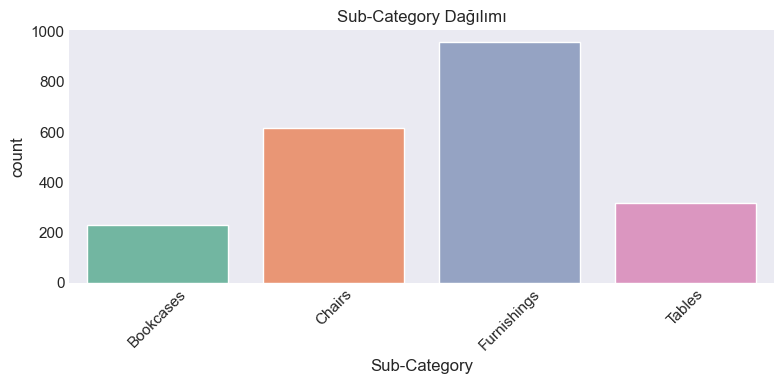

c:\Users\asus\anaconda3\envs\miuul1env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


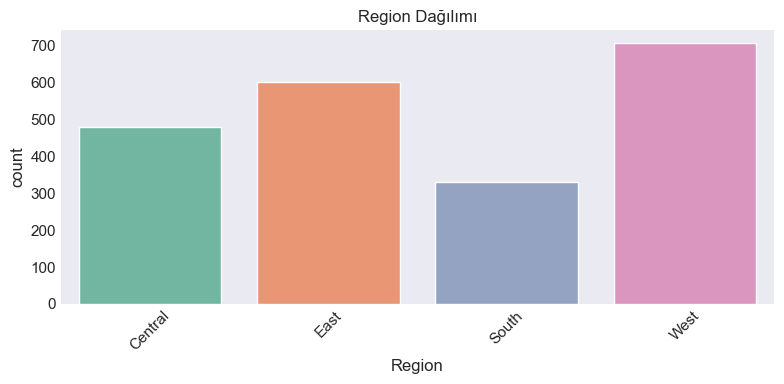

In [55]:
# Kategorik değişkenlerin dağılımlarını görselleştirelim
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'{col} Dağılımı')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


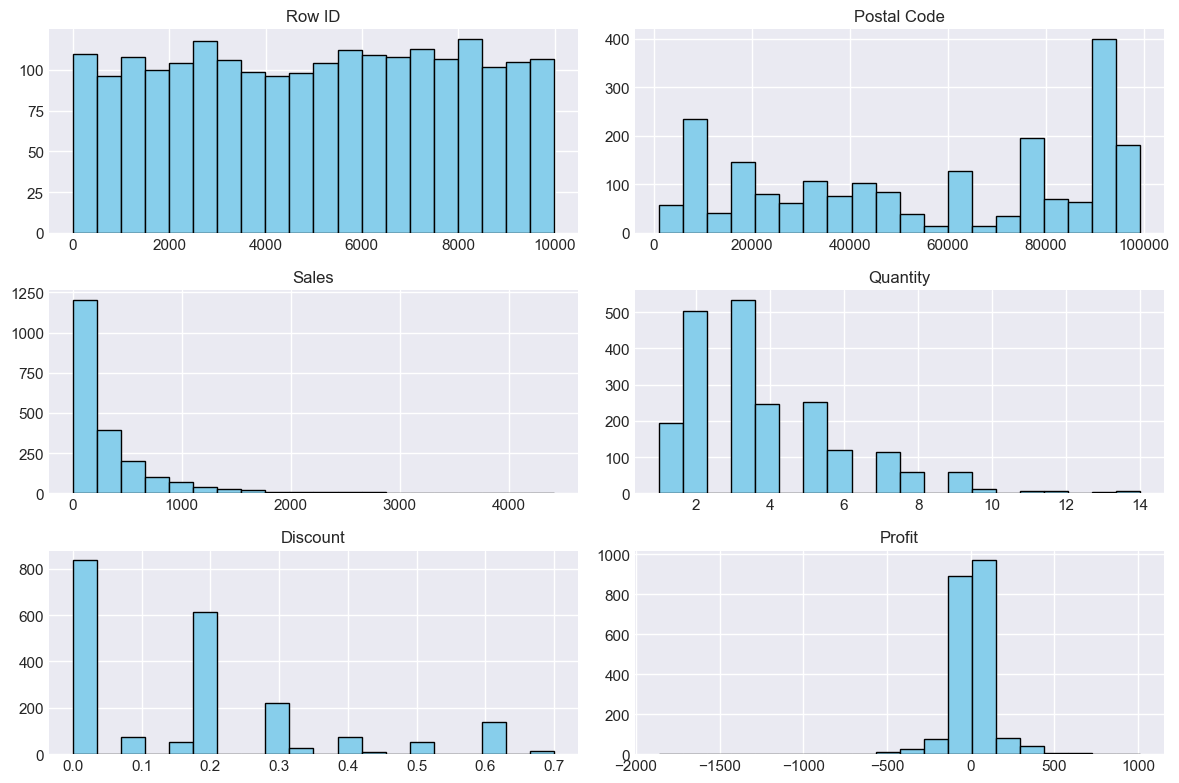

In [56]:
# Sayısal değişkenlerin histogramlarını çizelim
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_columns].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


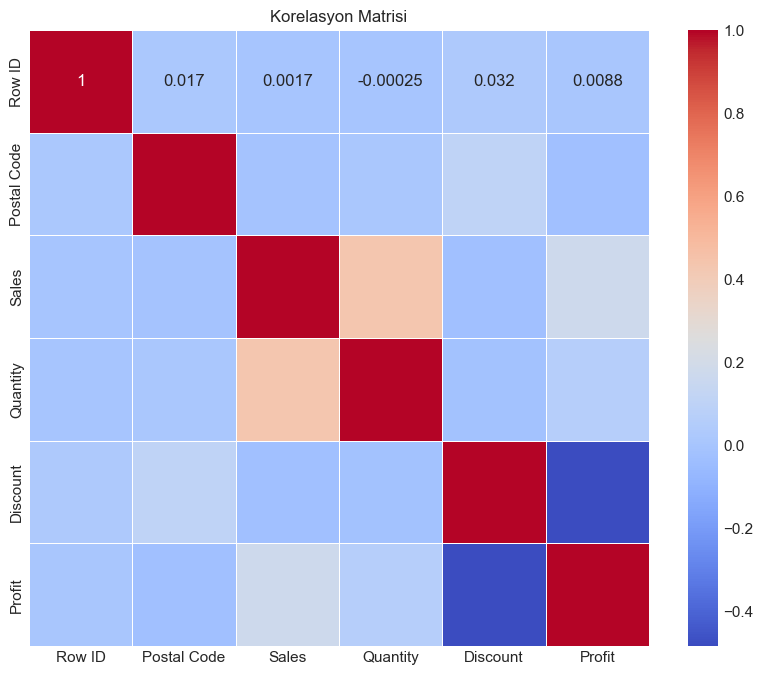

In [59]:
# Korelasyon matrisini hesaplayalım
corr_matrix = df[numerical_columns].corr()

# Korelasyon matrisini görselleştirelim
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()


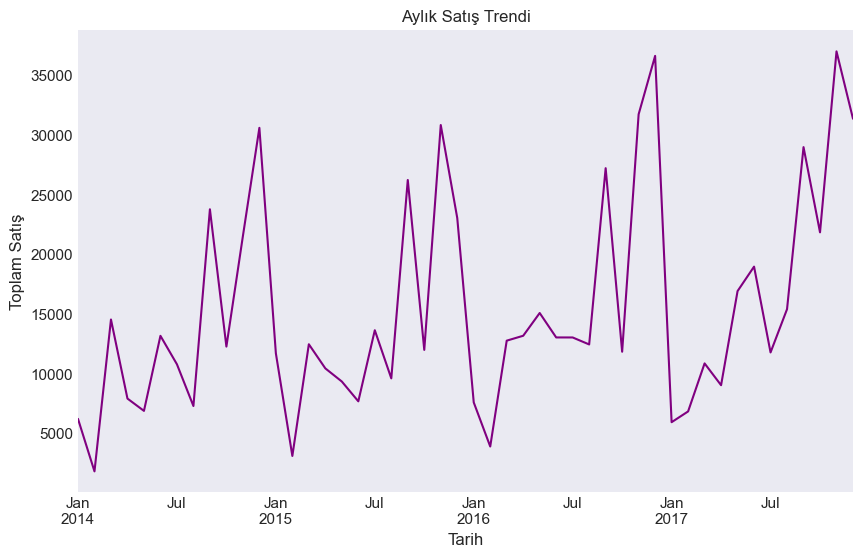

In [60]:
# Zaman bazında satışların değişimini inceleyelim
df.set_index('Order Date', inplace=True)

# Aylık satış trendi
monthly_sales = df['Sales'].resample('M').sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(color='purple')
plt.title('Aylık Satış Trendi')
plt.ylabel('Toplam Satış')
plt.xlabel('Tarih')
plt.show()

# Veri setini eski haline getirelim (index olarak tekrar Row ID kullanalım)
df.reset_index(inplace=True)


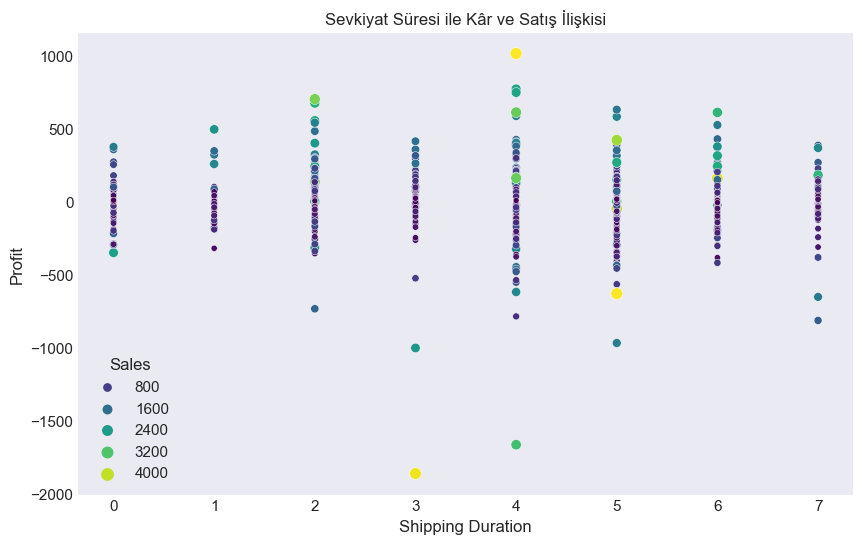

In [67]:
# Sevkiyat süresinin kâr ve satış üzerindeki etkisi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Shipping Duration', y='Profit', data=df, hue='Sales', palette='viridis', size='Sales')
plt.title('Sevkiyat Süresi ile Kâr ve Satış İlişkisi')
plt.show()


c:\Users\asus\anaconda3\envs\miuul1env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


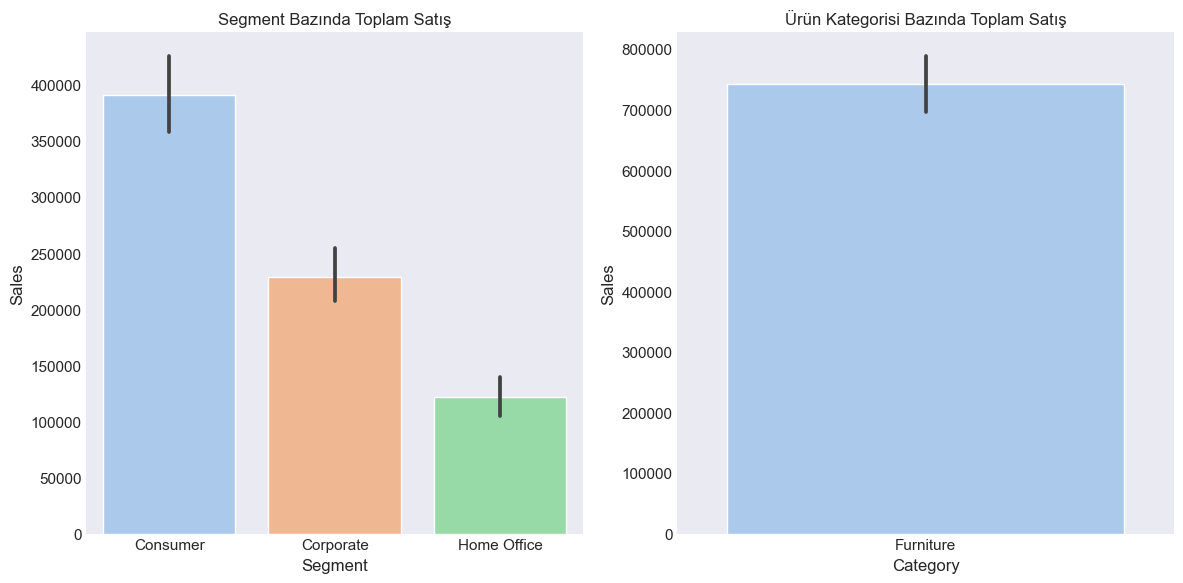

c:\Users\asus\anaconda3\envs\miuul1env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


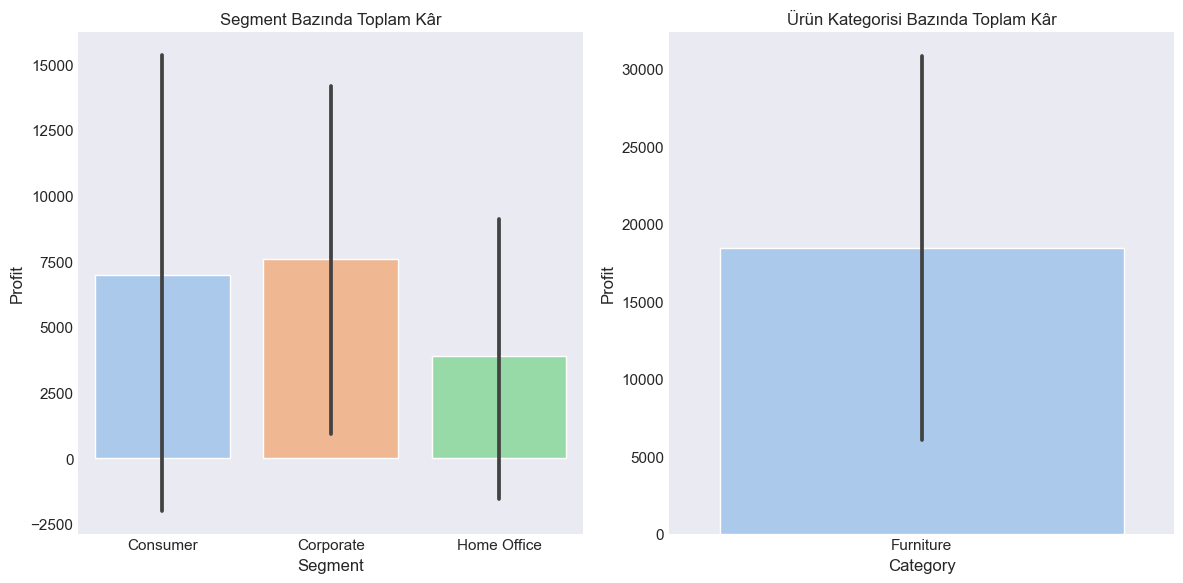

In [68]:
# Segment ve ürün kategorisi bazında toplam satış ve kâr
plt.figure(figsize=(12, 6))

# Segment bazında
plt.subplot(1, 2, 1)
sns.barplot(x='Segment', y='Sales', data=df, estimator=sum, palette='pastel')
plt.title('Segment Bazında Toplam Satış')

# Ürün kategorisi bazında
plt.subplot(1, 2, 2)
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, palette='pastel')
plt.title('Ürün Kategorisi Bazında Toplam Satış')

plt.tight_layout()
plt.show()

# Kar analizi
plt.figure(figsize=(12, 6))

# Segment bazında
plt.subplot(1, 2, 1)
sns.barplot(x='Segment', y='Profit', data=df, estimator=sum, palette='pastel')
plt.title('Segment Bazında Toplam Kâr')

# Ürün kategorisi bazında
plt.subplot(1, 2, 2)
sns.barplot(x='Category', y='Profit', data=df, estimator=sum, palette='pastel')
plt.title('Ürün Kategorisi Bazında Toplam Kâr')

plt.tight_layout()
plt.show()


c:\Users\asus\anaconda3\envs\miuul1env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\asus\anaconda3\envs\miuul1env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


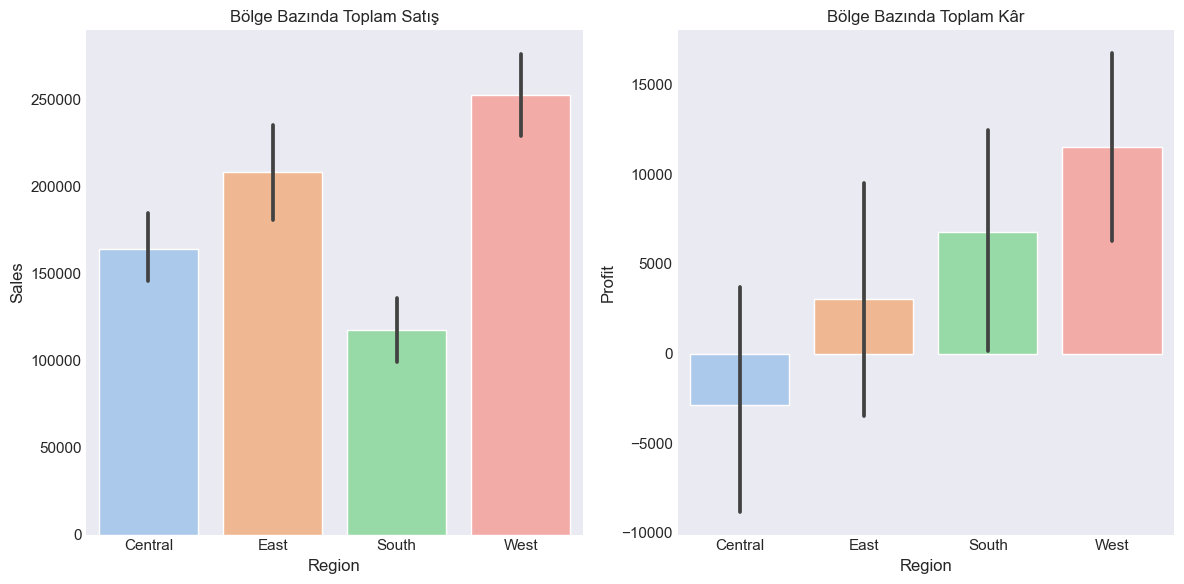

In [69]:
plt.figure(figsize=(12, 6))

# Bölge bazında toplam satış
plt.subplot(1, 2, 1)
sns.barplot(x='Region', y='Sales', data=df, estimator=sum, palette='pastel')
plt.title('Bölge Bazında Toplam Satış')

# Bölge bazında toplam kâr
plt.subplot(1, 2, 2)
sns.barplot(x='Region', y='Profit', data=df, estimator=sum, palette='pastel')
plt.title('Bölge Bazında Toplam Kâr')

plt.tight_layout()
plt.show()


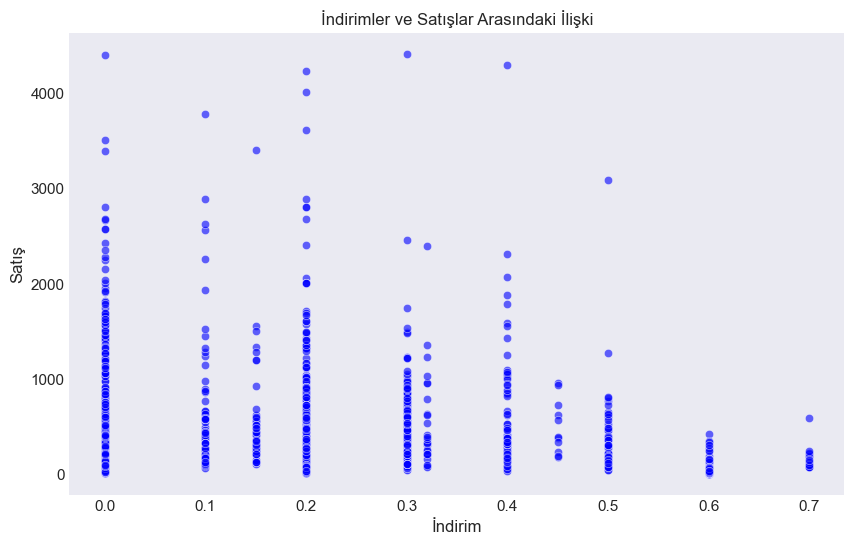

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Sales', data=df, color='blue', alpha=0.6)
plt.title('İndirimler ve Satışlar Arasındaki İlişki')
plt.xlabel('İndirim')
plt.ylabel('Satış')
plt.show()


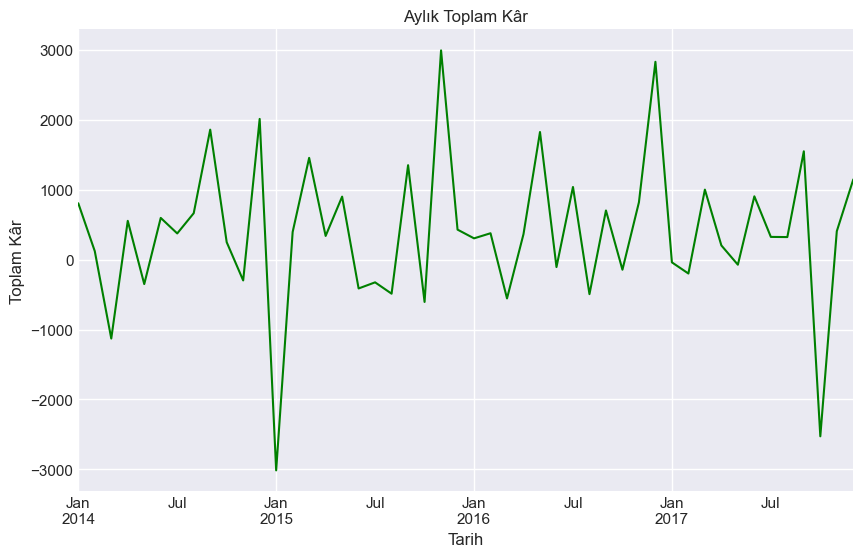

In [72]:
# Tarih sütununu indeks olarak ayarlama
df.set_index('Order Date', inplace=True)
# Aylık toplam kârı hesaplayalım
monthly_profit = df['Profit'].resample('M').sum()

# Aylık toplam kârı çizdirelim
plt.figure(figsize=(10, 6))
monthly_profit.plot(color='green')
plt.title('Aylık Toplam Kâr')
plt.ylabel('Toplam Kâr')
plt.xlabel('Tarih')
plt.grid(True)
plt.show()


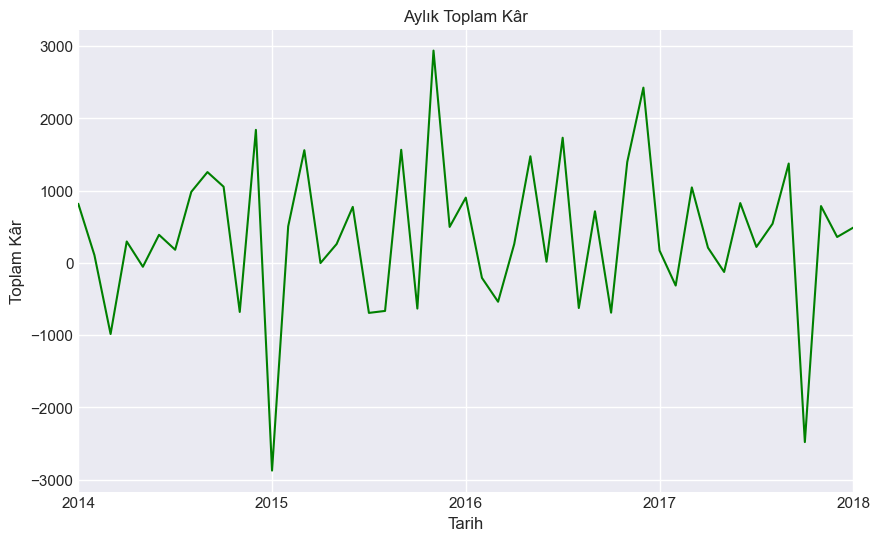

In [73]:
# Sevkiyat tarihi sütununu datetime formatına çevir
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Sevkiyat tarihini indeks olarak ayarlama
df.set_index('Ship Date', inplace=True)

# Aylık toplam kârı hesaplayalım
monthly_profit = df['Profit'].resample('M').sum()

# Aylık toplam kârı çizdirelim
plt.figure(figsize=(10, 6))
monthly_profit.plot(color='green')
plt.title('Aylık Toplam Kâr')
plt.ylabel('Toplam Kâr')
plt.xlabel('Tarih')
plt.grid(True)
plt.show()


In [74]:
from sklearn.model_selection import train_test_split

# Özellikler ve hedef değişkeni tanımlama
features = df[['Sales', 'Quantity', 'Discount']]  # Özellikler
target = df['Profit']  # Hedef değişken

# Eğitim ve test kümesine ayırma
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Modeli oluşturma
model = LinearRegression()

# Modeli eğitim verisi ile eğitme
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Sonuçları değerlendirme
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 12780.86223084061
R^2 Score: 0.28550818881264695


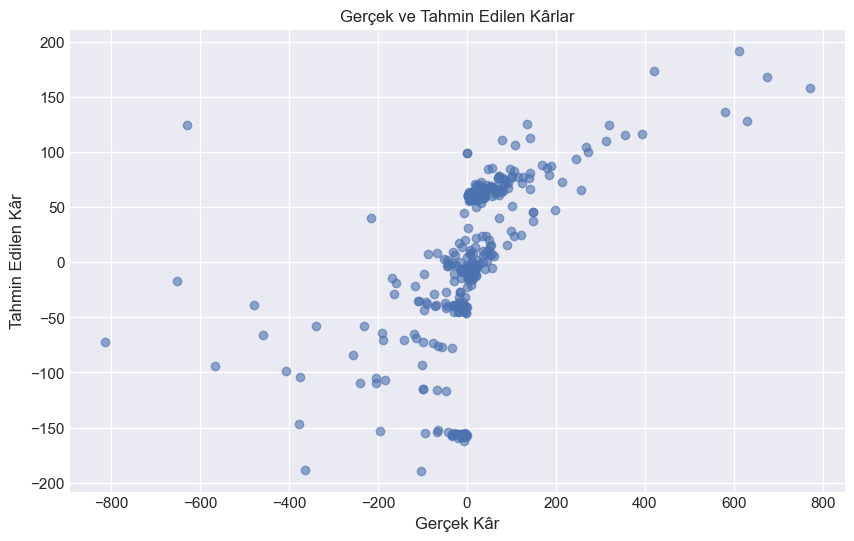

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Gerçek Kâr')
plt.ylabel('Tahmin Edilen Kâr')
plt.title('Gerçek ve Tahmin Edilen Kârlar')
plt.grid(True)
plt.show()


# Satış ve Kâr Analizi Raporu
**Tarih:** 2024-09-10  
**Yazar:** Hakan Çelik

## Giriş
Bu rapor, Store Sales Forecasting veri seti üzerinde yapılan analiz ve modelleme sürecini kapsamaktadır. Amacımız, satış ve kâr ilişkisini anlamak ve gelecekteki kârı tahmin etmek.


## Veri Analizi


### Veri Temizleme ve Ön İşleme
- Eksik değerlerin işlenmesi
- Veri dönüşümleri

### Analiz ve Görselleştirmeler
- Satış ve kâr trendleri
- Kârın aylık değişimi


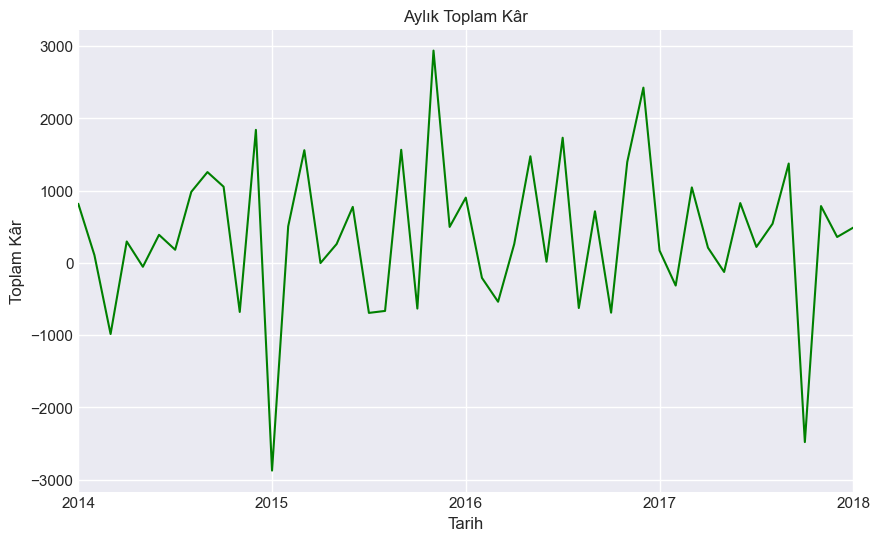

In [77]:
plt.figure(figsize=(10, 6))
monthly_profit.plot(color='green')
plt.title('Aylık Toplam Kâr')
plt.ylabel('Toplam Kâr')
plt.xlabel('Tarih')
plt.grid(True)
plt.show()


## Modelleme

### Kullanılan Modeller
- Lineer Regresyon

### Model Eğitim Süreci
Kod parçaları ve eğitim süreci hakkında bilgi.

### Model Performansı
Performans değerlendirme sonuçları ve grafikler.


In [78]:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 12780.86223084061
R^2 Score: 0.28550818881264695
